In [2]:
# For analyis let's use a pretty standard library like the one from Rethinking
library( rethinking )

In [3]:
# Load data
iidx <- read.csv( './data_lmtd_001.csv' )

In [4]:
head( iidx )

,X,index_ft,ik.index_ft,token_count_ft,index_nd,ik.index_nd,token_count_nd,index_do,ik.index_do,token_count_do,ratio_dialogue_text,genre_riddle,mean_literary_rating,org_lang
,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,0,Abdolah_Koning 2,0.2656876,9753,Abdolah_Koning 2 ZD,0.0000000,5730,Abdolah_Koning 2 AD,0.4901478,4018,0.4119758,Fiction,5.232143,nl
2,1,Abdolah_Kraai 17,0.6081772,9636,Abdolah_Kraai 17 ZD,0.6417323,8344,Abdolah_Kraai 17 AD,0.3875000,1290,0.1338730,Fiction,5.907960,nl
3,2,Adler-Olsen_VrouwInKooi 33,0.1754212,9627,Adler-Olsen_VrouwInKooi 33 ZD,0.0000000,5310,Adler-Olsen_VrouwInKooi 33 AD,0.3423598,4307,0.4473876,Suspense,3.761905,da
4,3,Ammaniti_JijEnIk 16,0.5003279,9587,Ammaniti_JijEnIk 16 ZD,0.5144995,6885,Ammaniti_JijEnIk 16 AD,0.4650655,2697,0.2813185,Fiction,5.613027,it
5,4,Baantjer_MesInRug 23,0.3166856,9588,Baantjer_MesInRug 23 ZD,0.0000000,3941,Baantjer_MesInRug 23 AD,0.4626866,5631,0.5872966,Suspense,2.920863,nl
6,5,Bakker_Omweg 40,0.1497758,9724,Bakker_Omweg 40 ZD,0.0000000,7246,Bakker_Omweg 40 AD,0.5122699,2458,0.2527766,Fiction,6.188679,nl


In [5]:
metrics <- data.frame( genre=character(0), narr_part=character(0), mean=double(0), stdv=double(0) )
genre <- c( 'Fiction', 'Suspense', 'Romantic' )
narr_part <- c( 'ik.index_ft', 'ik.index_nd', 'ik.index_do' )
narr_part_map <- c( ik.index_ft='FT', ik.index_nd='ND', ik.index_do='DO' )
for( g in genre ) {
    for( n in narr_part ) {
        metrics[ nrow( metrics ) + 1, ] <- list( g, narr_part_map[[n]], mean( iidx[ iidx$genre==g, n ] ), sd( iidx[ iidx$genre==g, n ] ) )
    }
}
metrics


,genre,narr_part,mean,stdv
,<chr>,<chr>,<dbl>,<dbl>
1,Fiction,FT,0.3213601,0.19510242
2,Fiction,ND,0.2502920,0.26645386
3,Fiction,DO,0.4688884,0.06305476
4,Suspense,FT,0.3117736,0.17128256
5,Suspense,ND,0.1970238,0.27456382
6,Suspense,DO,0.4371585,0.10925573
7,Romantic,FT,0.3334293,0.20280193
8,Romantic,ND,0.2502829,0.31400158
9,Romantic,DO,0.4629377,0.02612357


In [7]:
# To put the data in a table with subcategories we use the `tables` package.

library( tables )

# We need to read `tables::tabular()`'s documentation at 
# https://cran.r-project.org/web/packages/tables/tables.pdf very 
# carefully indeed. The used notation is quite intricate but elegant once
# you get it.

# The "trouble" with using `tables` out of the box is that it produces 
# "contingency" data: it counts and reports how many means, stdevs, etc. 
# have been found in each subcategory. But we just want to subategorize
# the table data. To do that pay attention especially to the documentation
# on p.26:
#   "If the term evaluates to a function, it should be a summary function
#   that produces a scalar value when applied to a vector of values, and 
#   that scalar will be displayed in the table."
# Thus if we want to prevent the counts we need to provide a function that
# returns the scalar we want instead. In this case that means a function
# that just returns its input.

do_nothing <- function(X) {
    X
}

In [8]:
tabular( Factor(genre) ~ Factor(narr_part) * ( do_nothing * mean + do_nothing * stdv ), data=metrics )

                                                                           
          narr_part                                                        
          DO                    FT                    ND                   
          do_nothing do_nothing do_nothing do_nothing do_nothing do_nothing
 genre    mean       stdv       mean       stdv       mean       stdv      
 Fiction  0.4689     0.06305    0.3214     0.1951     0.2503     0.2665    
 Romantic 0.4629     0.02612    0.3334     0.2028     0.2503     0.3140    
 Suspense 0.4372     0.10926    0.3118     0.1713     0.1970     0.2746    

In [9]:
# Almost there, we only need to get rid of the superfluous "do_nothing" label
# in the table. We can use the "pseudo function" `Heading()` for this. I guess
# it's not really "abuse" if the thing itself is already called a "pseudo function".

tabular( Factor(genre) ~ Factor(narr_part) * ( Heading() * do_nothing * mean + Heading() * do_nothing * stdv ), data=metrics )

                                                       
          narr_part                                    
          DO                FT            ND           
 genre    mean      stdv    mean   stdv   mean   stdv  
 Fiction  0.4689    0.06305 0.3214 0.1951 0.2503 0.2665
 Romantic 0.4629    0.02612 0.3334 0.2028 0.2503 0.3140
 Suspense 0.4372    0.10926 0.3118 0.1713 0.1970 0.2746

In [93]:
# The above solution works and is kept there for 'historic reasons'.
# However, in the end we prefered a different tabular lay out, hence…

metrics <- data.frame( genre=character(0), mean_MLR=double(0), stdv_MLR=double(0), narr_part=character(0), mean=double(0), stdv=double(0) )
genre <- c( 'Fiction', 'Suspense', 'Romantic' )
narr_part <- c( 'ik.index_ft', 'ik.index_nd', 'ik.index_do' )
narr_part_map <- c( ik.index_ft='FT', ik.index_nd='ND', ik.index_do='DO' )
for( g in genre ) {
    for( n in narr_part ) {
        metrics[ nrow( metrics ) + 1, ] <- list( 
            g, 
            mean( iidx[ iidx$genre==g, 'mean_literary_rating' ] ),
            sd( iidx[ iidx$genre==g, 'mean_literary_rating' ] ),
            narr_part_map[[n]], mean( iidx[ iidx$genre==g, n ] ), sd( iidx[ iidx$genre==g, n ] ) )
    }
}
metrics


,genre,mean_MLR,stdv_MLR,narr_part,mean,stdv
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,Fiction,5.171844,0.9819182,FT,0.3213601,0.19510242
2,Fiction,5.171844,0.9819182,ND,0.2502920,0.26645386
3,Fiction,5.171844,0.9819182,DO,0.4688884,0.06305476
4,Suspense,3.909908,0.4576844,FT,0.3117736,0.17128256
5,Suspense,3.909908,0.4576844,ND,0.1970238,0.27456382
6,Suspense,3.909908,0.4576844,DO,0.4371585,0.10925573
7,Romantic,3.038672,0.3625999,FT,0.3334293,0.20280193
8,Romantic,3.038672,0.3625999,ND,0.2502829,0.31400158
9,Romantic,3.038672,0.3625999,DO,0.4629377,0.02612357


In [94]:
# That is all the information we want in the table.
# But we want to lose the duplicate values in the first three columns…
metrics[c(2,3,5,6,8,9),c(1,2,3)] <- c(NA,NA,NA)
metrics


,genre,mean_MLR,stdv_MLR,narr_part,mean,stdv
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,Fiction,5.171844,0.9819182,FT,0.3213601,0.19510242
2,NA,NA,NA,ND,0.2502920,0.26645386
3,NA,NA,NA,DO,0.4688884,0.06305476
4,Suspense,3.909908,0.4576844,FT,0.3117736,0.17128256
5,NA,NA,NA,ND,0.1970238,0.27456382
6,NA,NA,NA,DO,0.4371585,0.10925573
7,Romantic,3.038672,0.3625999,FT,0.3334293,0.20280193
8,NA,NA,NA,ND,0.2502829,0.31400158
9,NA,NA,NA,DO,0.4629377,0.02612357


In [95]:
# Now we load a library geared for pretty printing tables.
library( huxtable )

In [103]:
# We make a huxtable from our table.
hux_metrics <- as_hux( metrics )
number_format( hux_metrics ) <- 2

In [108]:
hux_metrics <- set_bold( hux_metrics, 1, everywhere )
hux_metrics <- set_align( hux_metrics, -1, everywhere, value='right')
hux_metrics <- set_top_border( hux_metrics, 1, everywhere, value=0.4 )
hux_metrics <- set_bottom_border( hux_metrics, 1, everywhere, value=0.4 )
hux_metrics <- set_bottom_border( hux_metrics, 4, everywhere, value=0.4 )
hux_metrics <- set_bottom_border( hux_metrics, 7, everywhere, value=0.4 )
hux_metrics <- set_bottom_border( hux_metrics, 10, everywhere, value=0.4 )
hux_metrics <- set_font_size( hux_metrics, everywhere, everywhere, value=12 )
IRdisplay::display_html( to_html( hux_metrics ) )

genre,mean_MLR,stdv_MLR,narr_part,mean,stdv
Fiction,5.17,0.98,FT,0.32,0.20
,,,ND,0.25,0.27
,,,DO,0.47,0.06
Suspense,3.91,0.46,FT,0.31,0.17
,,,ND,0.20,0.27
,,,DO,0.44,0.11
Romantic,3.04,0.36,FT,0.33,0.20
,,,ND,0.25,0.31
,,,DO,0.46,0.03


In [10]:
# We're going to use quap for linear regression, which is probably
# total overkill, but well it works.

# General model frame
flist <- alist(
    MLR ~ dnorm( mu, sigma ),
    mu <- a + biFT * iFT,
    a ~ dnorm( 0, 0.2 ),
    biFT ~ dnorm( 0, 0.5 ),
    sigma ~ dexp( 1 )
)

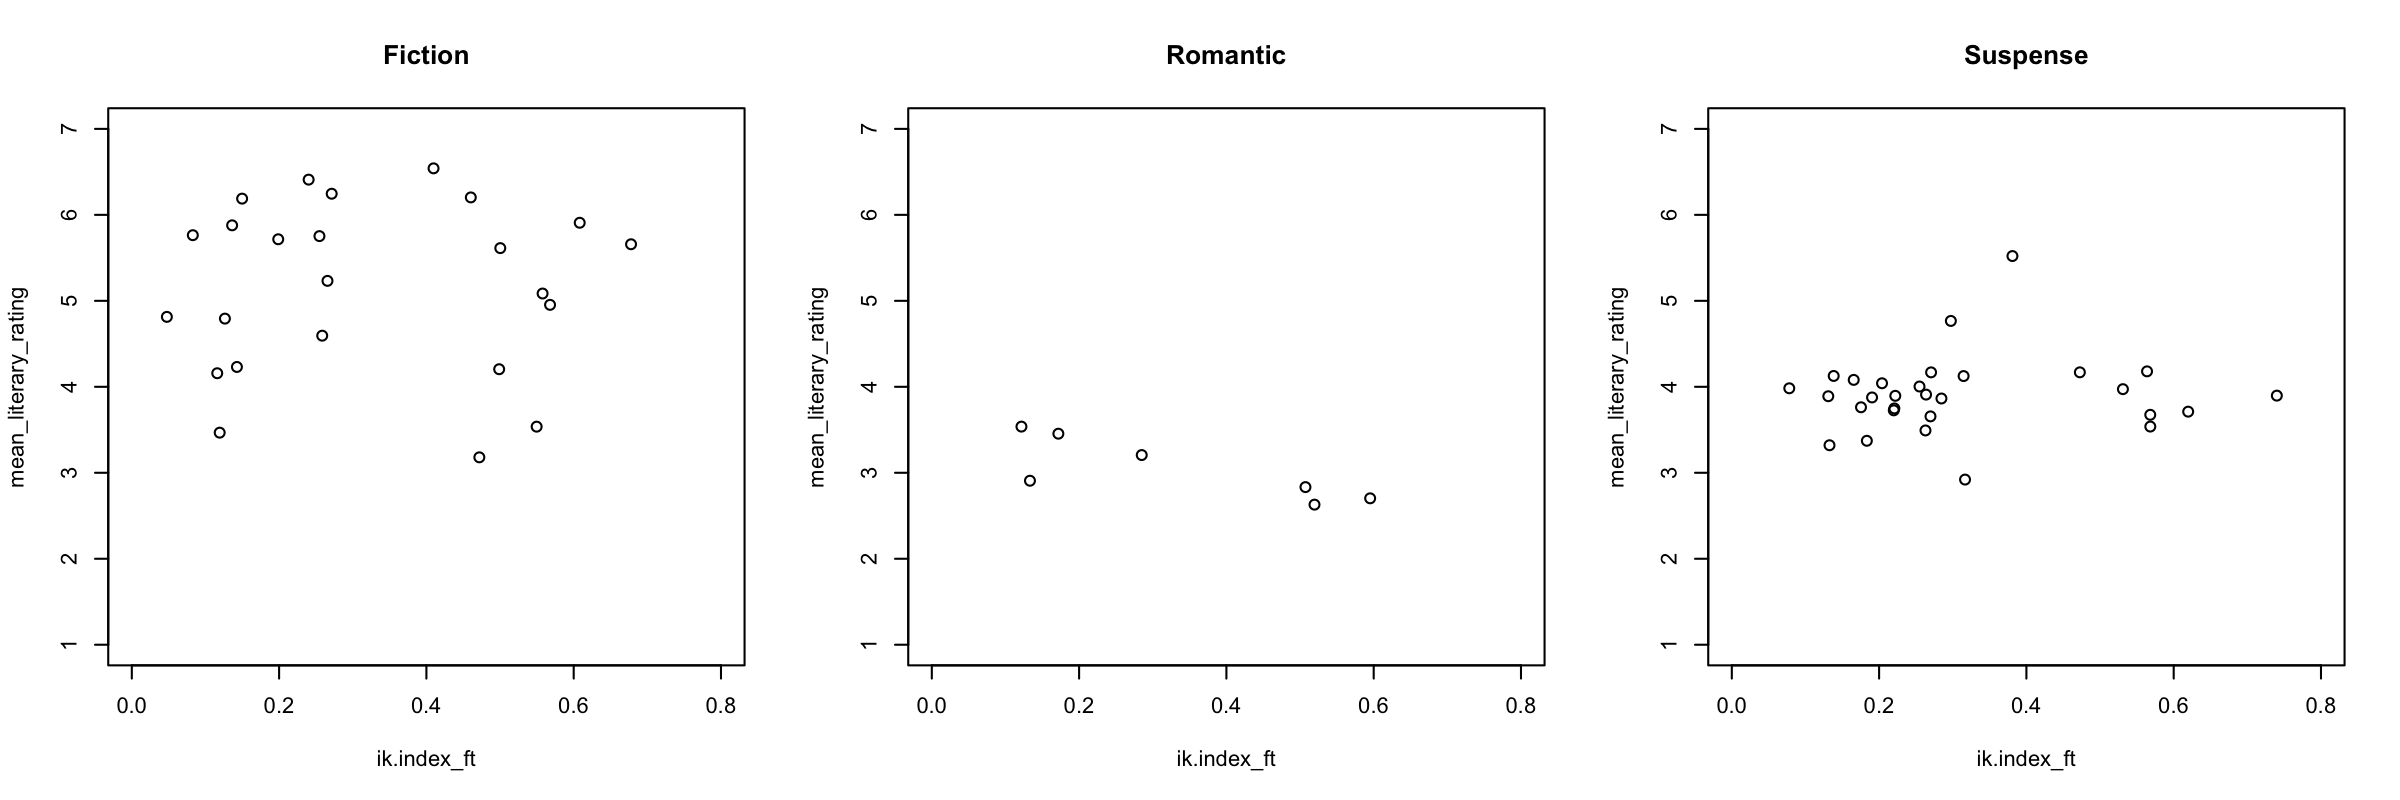

In [40]:
# These are just some display options to get a nice view of multiple plots.
options( repr.plot.width=12, repr.plot.height=4, repr.plot.res=200 )
par( mfrow=c( 1, 3 ) )

# Let's first plot the raw data.
genres <- levels( factor( iidx$genre ) )
for( genre in genres ) {
    MLR_genre <- iidx[ iidx$genre==genre, c( 'ik.index_ft', 'mean_literary_rating' ) ]
    plot( main=genre, MLR_genre, xlim=c( 0.0, 0.8 ), ylim=c( 1.0, 7.0 ) )
}

In [41]:
# We *know* something about the priors, so let's use that
mean( iidx$mean_literary_rating ) # => 4.31303827704795
sd( iidx$mean_literary_rating ) # => 1.0301559487299

[1] 4.313038

[1] 1.030156

In [42]:
plot_correlates <- function( genres ) {

    for( genre in genres ) {
        
        # Select the data.
        d_MLR_iFT <- data.frame(
            MLR = iidx[ iidx$genre==genre, c( 'mean_literary_rating' ) ],
            iFT = iidx[ iidx$genre==genre, c( 'ik.index_ft' ) ]
        )

        # Create a linear model.
        flist <- alist(
            MLR ~ dnorm( mu, sigma ),
            mu <- a + biFT * iFT,
            a ~ dnorm( 4.31, 1.03 ), # Use the pre-calculated priors.
            biFT ~ dnorm( 0, 1.5 ),
            sigma ~ dlnorm( 0, 1.5 )
        )
        m_MLR_iFT <- quap(
            flist, 
            data = d_MLR_iFT 
        )
        
        # Compute percentile interval of mean.
        MLR_seq <- seq( from=-0.2, to=1, length.out=30 ) 
        mu <- link( m_MLR_iFT, data=list( iFT=MLR_seq) )
        mu.mean <- apply( mu, 2, mean )
        mu.PI <- apply( mu, 2, PI ) 

        # Plot it all.
        plot( MLR ~ iFT, data=d_MLR_iFT, col=rangi2, main=genre, xlab='ik-Index', ylab='Mean Literary Rating', xlim=c( 0.0, 0.8 ), ylim=c( 1.0, 7.0 ) )
        lines( MLR_seq, mu.mean, lwd=2 )
        shade( mu.PI, MLR_seq )
    }
}

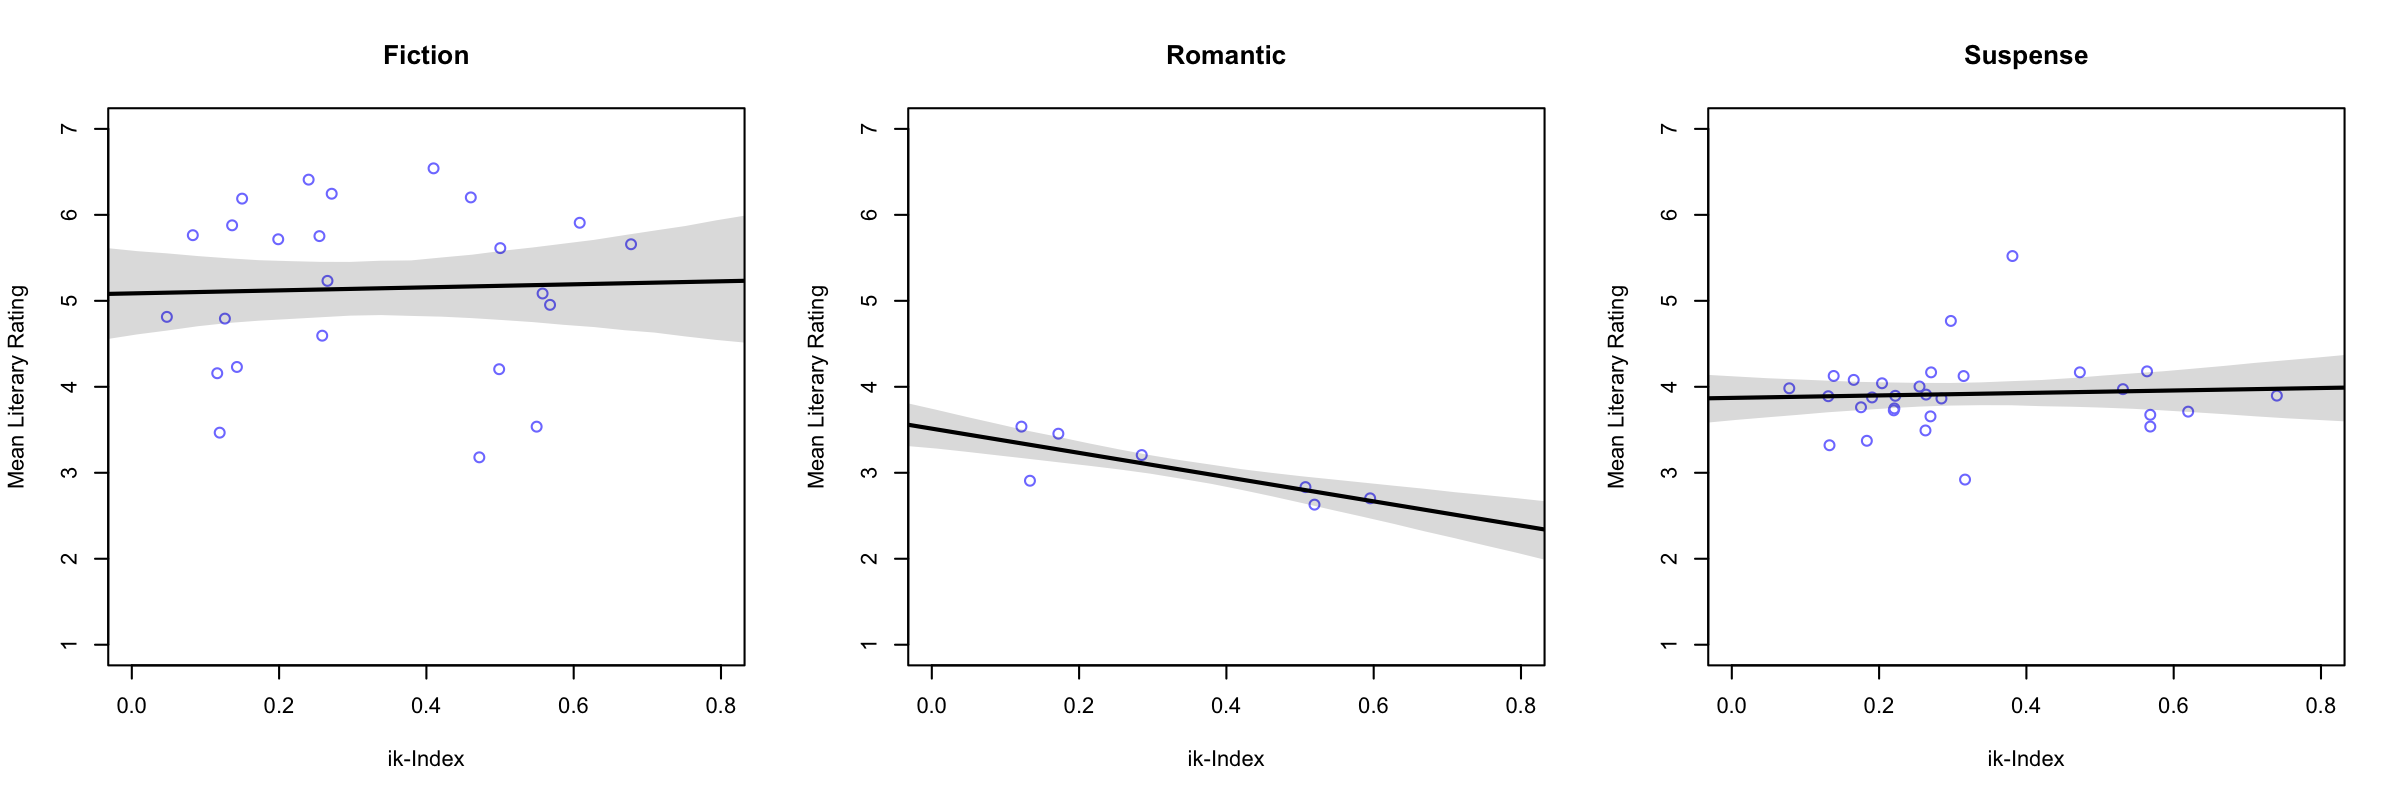

In [43]:
# Just display options again
options( repr.plot.width=12, repr.plot.height=4, repr.plot.res=200 )
# If we want to save the figure for publication we switch this to `TRUE`
save_fig=FALSE
if( save_fig ){
    png( 'images/20200708_1924/mlr_vs_iidxFT_by_genre.png', width=2200, height=800, pointsize=32 )
}
par( mfrow=c(1,3) )

genres <- levels( factor( iidx$genre ) )
suppressWarnings( plot_correlates( genres ) )

if( save_fig ){
    dev.off()
}

[1] 4.313038

[1] 1.030156

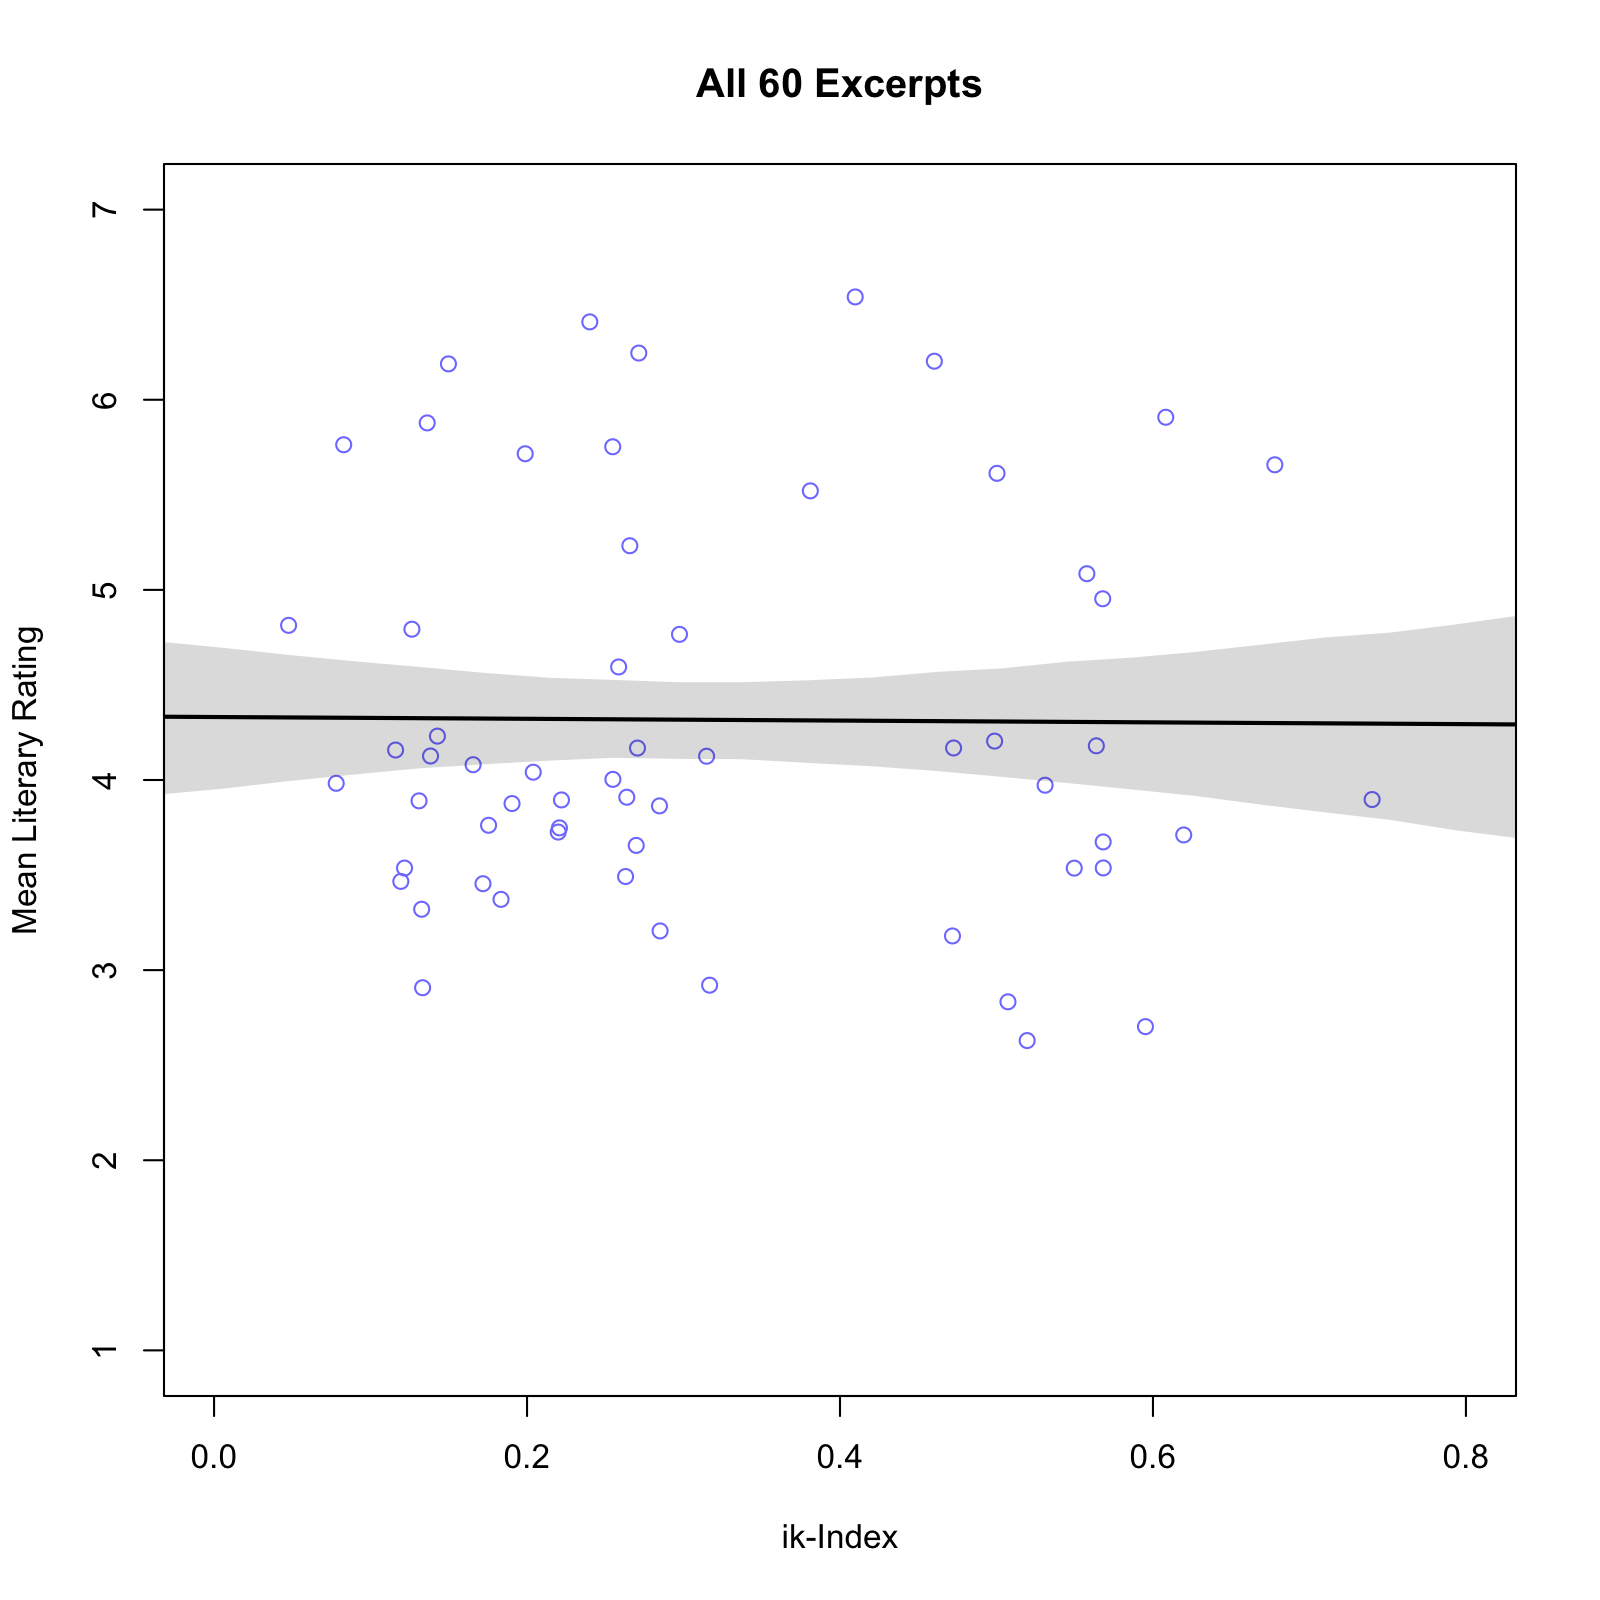

In [44]:
# On 20200727 Lisanne realized we did not have a "general" regression, so…

# Just display options and save utility function.
options( repr.plot.width=8, repr.plot.height=8, repr.plot.res=200 )
par( mfrow=c( 1, 1 ) )
save_fig=FALSE
if( save_fig ){
    png( 'images/20200708_1924/mlr_vs_iidxFT.png', width=734, height=800, pointsize=20 )
}

# Again, we *know* something about the priors, so let's use that.
mean( iidx$mean_literary_rating ) # => 4.31303827704795
sd( iidx$mean_literary_rating ) # => 1.0301559487299

d_MLR_iFT <- data.frame(
    MLR = iidx[ , c( 'mean_literary_rating' ) ],
    iFT = iidx[ , c( 'ik.index_ft' ) ]
)

# Create a linear model.
flist <- alist(
    MLR ~ dnorm( mu, sigma ),
    mu <- a + biFT * iFT,
    a ~ dnorm( 4.31, 1.03 ), # Use the pre-calculated priors
    biFT ~ dnorm( 0, 1.5 ),
    sigma ~ dlnorm( 0, 1.5 )
)
m_MLR_iFT <- quap(
    flist, 
    data = d_MLR_iFT 
)

# Compute percentile interval of mean.
MLR_seq <- seq( from=-0.2, to=1, length.out=30 ) 
mu <- link( m_MLR_iFT, data=list( iFT=MLR_seq) )
mu.mean <- apply( mu, 2, mean )
mu.PI <- apply( mu, 2, PI ) 

# Plot it all.
plot( MLR ~ iFT, data=d_MLR_iFT, col=rangi2, main='All 60 Excerpts', xlab='ik-Index', ylab='Mean Literary Rating', xlim=c( 0.0, 0.8 ), ylim=c( 1.0, 7.0 ) )
lines( MLR_seq, mu.mean, lwd=2 )
suppressWarnings( 
    shade( mu.PI, MLR_seq )
)

if( save_fig ){
    dev.off()
}

In [45]:
# We want the same, but just for narrative text, non dialogue.

# We *know* something about the priors, so let's use that.
mean( iidx$mean_literary_rating ) # => 4.31303827704795
sd( iidx$mean_literary_rating ) # => 1.0301559487299

plot_correlates_nd <- function( genres ) {
    for( genre in genres ) {
        d_MLR_iFT <- data.frame(
            MLR = iidx[ iidx$genre==genre, c( 'mean_literary_rating' ) ],
            iFT = iidx[ iidx$genre==genre, c( 'ik.index_nd' ) ]
        )
        # Create a model.
        flist <- alist(
            MLR ~ dnorm( mu, sigma ),
            mu <- a + biFT * iFT,
            a ~ dnorm( 4.31, 1.03 ),
            biFT ~ dnorm( 0, 1.5 ),
            sigma ~ dlnorm( 0, 1.5 )
        )
        m_MLR_iFT <- quap(
            flist, 
            data = d_MLR_iFT 
        )
        # Compute percentile interval of mean.
        MLR_seq <- seq( from=-0.2, to=1, length.out=30 ) 
        mu <- link( m_MLR_iFT, data=list( iFT=MLR_seq) )
        mu.mean <- apply( mu, 2, mean )
        mu.PI <- apply( mu, 2, PI ) 
        # Plot it all.q
        plot( MLR ~ iFT, data=d_MLR_iFT, col=rangi2, main=genre, xlab='ik-Index Non Dialogue', ylab='Mean Literary Rating', xlim=c( 0.0, 0.8 ), ylim=c( 1.0, 7.0 ) )
        lines( MLR_seq, mu.mean, lwd=2 )
        shade( mu.PI, MLR_seq )
    }
}

[1] 4.313038

[1] 1.030156

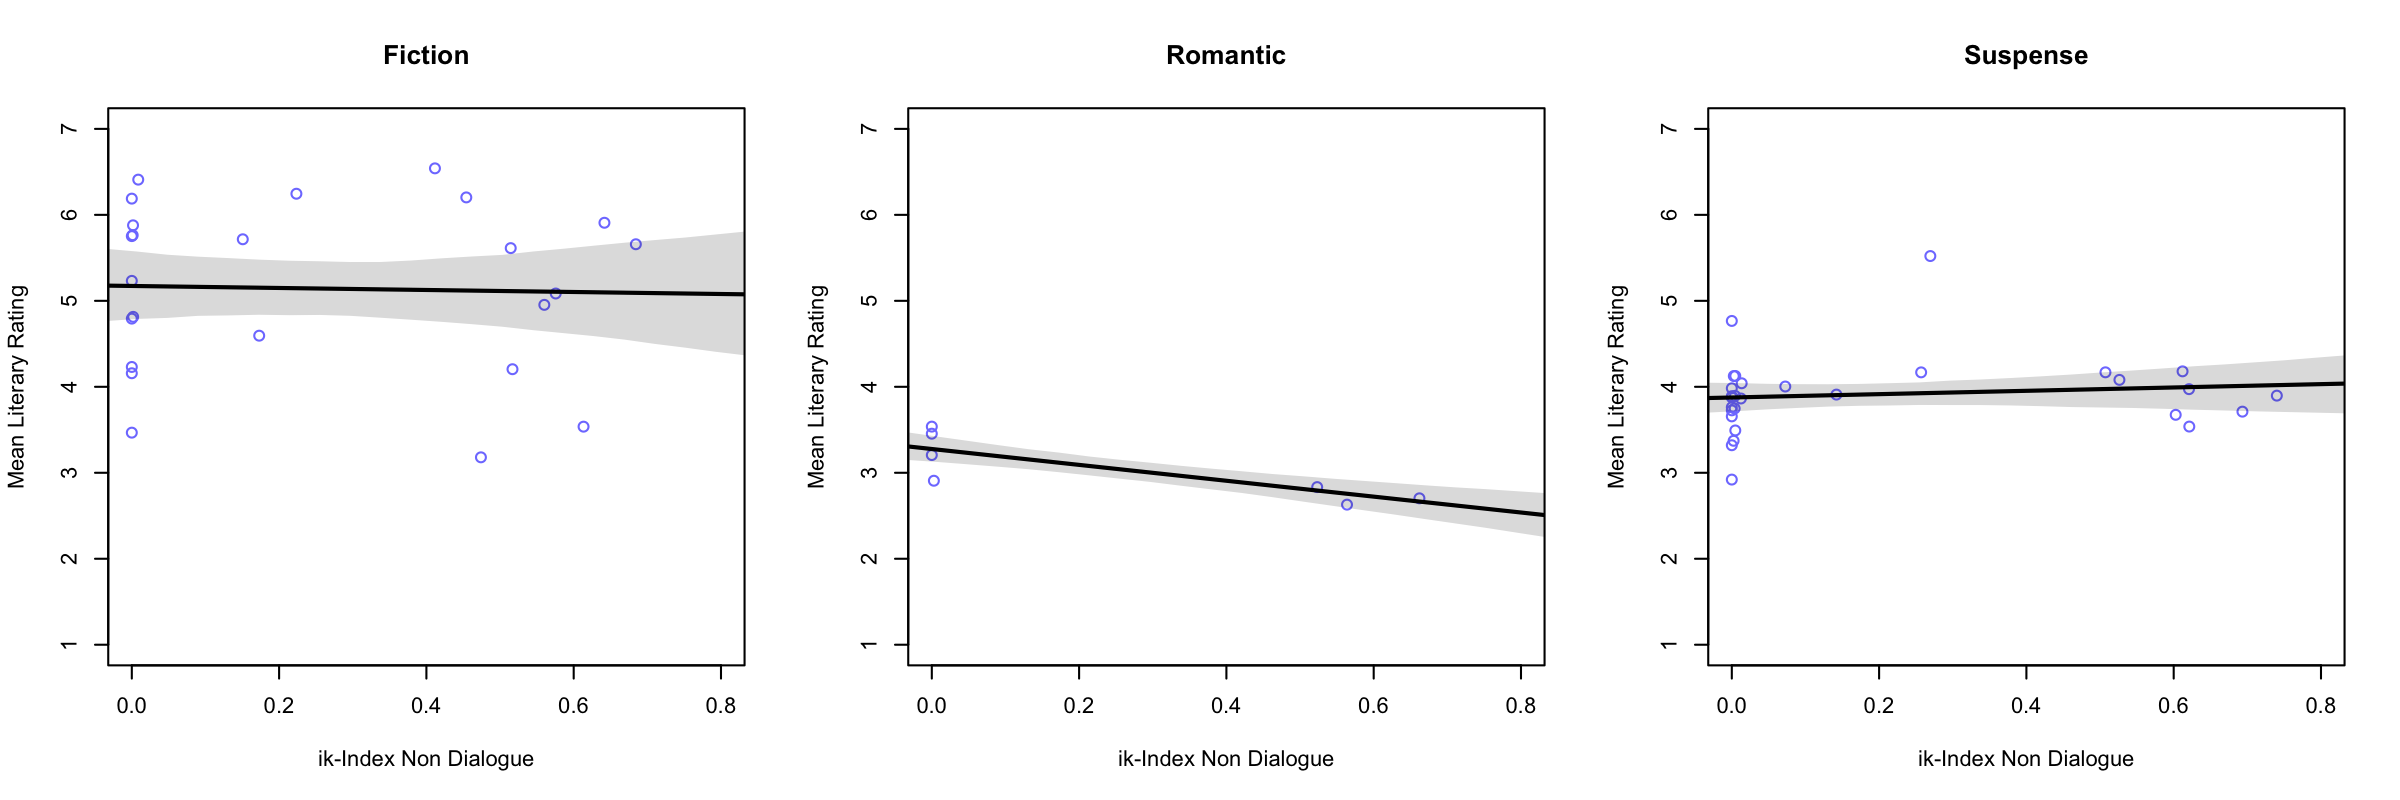

In [46]:
options( repr.plot.width=12, repr.plot.height=4, repr.plot.res=200 )
par( mfrow=c(2,3) )

save_fig=FALSE
if( save_fig ){
    png( 'images/20200708_1924/mlr_vs_iidxND_by_genre.png', width=2200, height=800, pointsize=32 )
}
par( mfrow=c(1,3) )

genres <- levels( factor( iidx$genre ) )
suppressWarnings( plot_correlates_nd( genres ) )

if( save_fig ){
    dev.off()
}

In [47]:
# And now we want the same, but just for narrative text, dialogue only.

# We *know* something about the priors, so let's use that.
mean( iidx$mean_literary_rating ) # => 4.31303827704795
sd( iidx$mean_literary_rating ) # => 1.0301559487299

plot_correlates_nd <- function( genres ) {
    for( genre in genres ) {
        d_MLR_iFT <- data.frame(
            MLR = iidx[ iidx$genre==genre, c( 'mean_literary_rating' ) ],
            iFT = iidx[ iidx$genre==genre, c( 'ik.index_do' ) ]
        )
        # Create a model.
        flist <- alist(
            MLR ~ dnorm( mu, sigma ),
            mu <- a + biFT * iFT,
            a ~ dnorm( 4.31, 1.03 ),
            biFT ~ dnorm( 0, 1.5 ),
            sigma ~ dlnorm( 0, 1.5 )
        )
        m_MLR_iFT <- quap(
            flist, 
            data = d_MLR_iFT 
        )
        # Compute percentile interval of mean.
        MLR_seq <- seq( from=-0.5, to=1, length.out=30 ) 
        mu <- link( m_MLR_iFT, data=list( iFT=MLR_seq) )
        mu.mean <- apply( mu, 2, mean )
        mu.PI <- apply( mu, 2, PI ) 
        # Plot it all.
        plot( MLR ~ iFT, data=d_MLR_iFT, col=rangi2, main=genre, xlab='ik-Index Dialogue Only', ylab='Mean Literary Rating', xlim=c( 0.0, 0.8 ), ylim=c( 1.0, 7.0 ) )
        lines( MLR_seq, mu.mean, lwd=2 )
        shade( mu.PI, MLR_seq )
    }
}

[1] 4.313038

[1] 1.030156

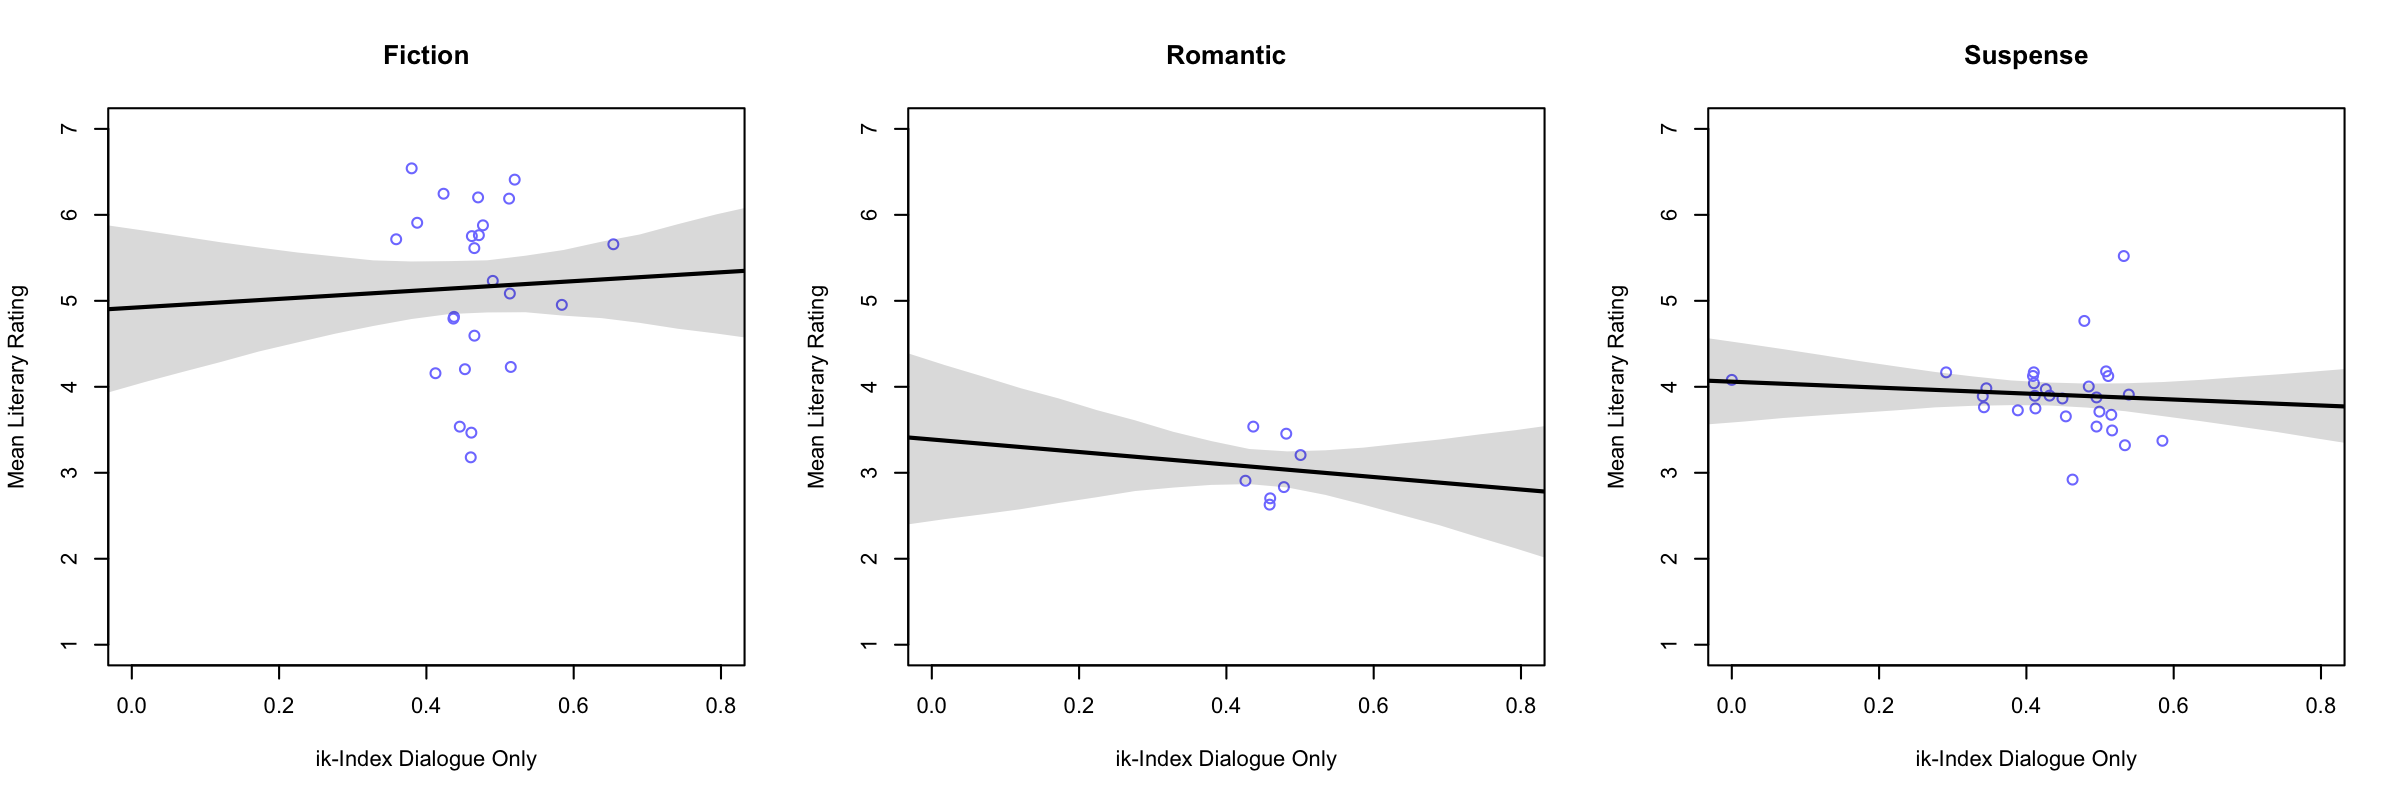

In [48]:
options( repr.plot.width=12, repr.plot.height=4, repr.plot.res=200 )
save_fig=FALSE
if( save_fig ){
    png( 'images/20200708_1924/mlr_vs_iidxDO_by_genre.png', width=2200, height=800, pointsize=32 )
}
par( mfrow=c(1,3) )

genres <- levels( factor( iidx$genre ) )
suppressWarnings( plot_correlates_nd( genres ) )

if( save_fig ){
    dev.off()
}

In [111]:
# Now we want to graph a lot of the data.
# R's default graphing colors are boring, let's use a more subtle palette.
library( RColorBrewer )
cols <- brewer.pal( 3, 'Set2' )

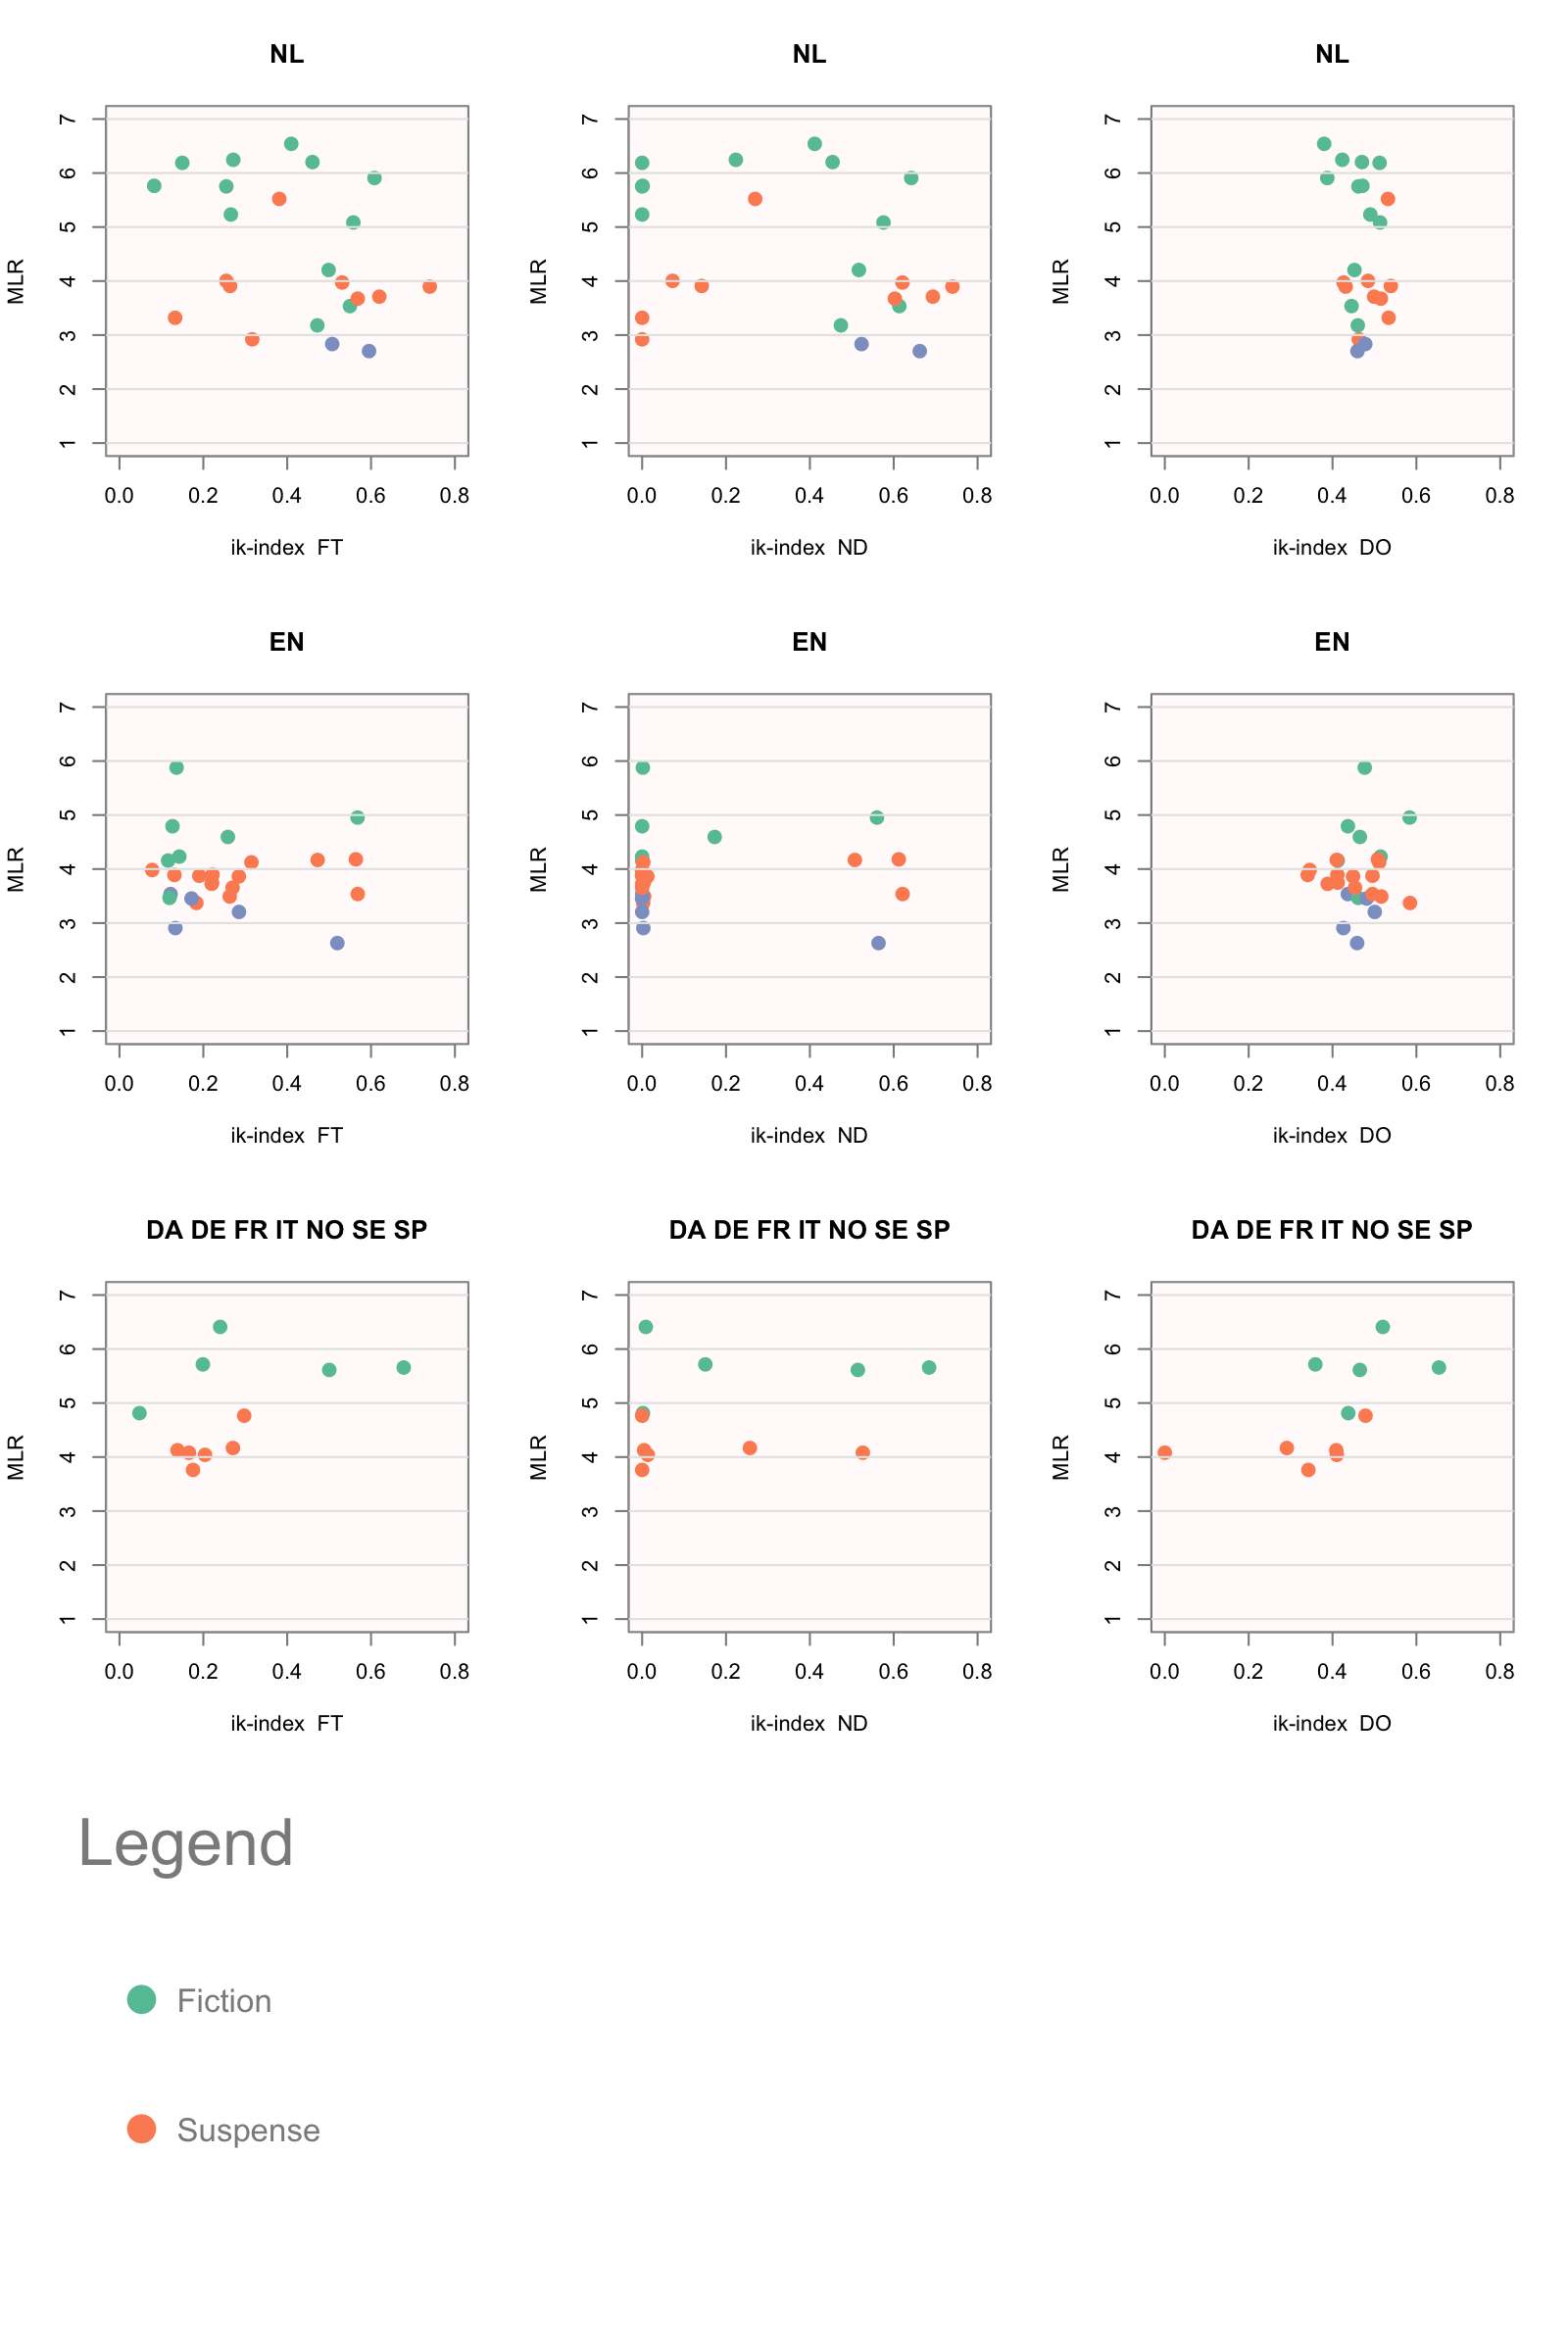

In [112]:
# This is just graphic options and the save utility.
options( repr.plot.width=8, repr.plot.height=12, repr.plot.res=200 )
save_fig=FALSE
if( save_fig ){
    png( 'images/20200708_1924/mlr_vs_iidx_by_narrpart_and_language.png', width=2200, height=2800, pointsize=32 )
}
par( fg='grey55', mfrow=c( 4, 3 ) )

# A bunch of code to separate the data out into different origin languages categories.
genre_id <- as.factor( iidx$genre_riddle )
other_languages <- levels( factor( iidx$org_lang, exclude=c( 'en', 'nl' ) ) )
languages <- list( list( 'nl' ), list( 'en' ), other_languages )

# Map genre to a specific color index.
map_color_to_int <- function( x ){
    color_int = 0 
    if( x=='Fiction' ){ color_int = 1 }
    if( x=='Suspense' ){ color_int = 2 }
    if( x=='Romantic' ){ color_int = 3 }
    return( color_int )
}

# Split data into narrative part (full text, non dialogue, and dialogue only) vs mean literary rating.
for( language in languages ) {
    rows <- iidx[ iidx$org_lang %in% language, ]
    color_id <- as.factor( rows$genre_riddle )
    color_id <- sapply( color_id, map_color_to_int )
    color_id <- sapply( color_id, function(x) cols[x] )
    narr_parts <- c( 'ft', 'nd', 'do' )
    for( narr_part in narr_parts ) {
        idx <- paste( 'ik.index_', narr_part, sep='' )
        xlabel <- paste( 'ik-index ', toupper( narr_part ) )
        plot( NULL, NULL, col=genre_id, pch=16, cex=1.5,
              xlim=c( 0.0, 0.8 ), ylim=c( 1.0, 7.0 ), xlab=xlabel, ylab='MLR', main=toupper( paste( language, collapse=' ' ) ) )
        rect( par('usr')[1],par('usr')[3],par('usr')[2],par('usr')[4],col = 'snow' )
        points( rows[[idx]], rows$mean_literary_rating, col=color_id, pch=16, cex=1.5 )
        grid( nx=NA, ny=NULL, lty='solid', col='grey90' )
    }
}

plot( NULL, xaxt='n', yaxt='n', bty='n', ylab='', xlab='', xlim=0:1, ylim=0:1 )
legend( 'topleft', legend=c( 'Fiction', 'Suspense', 'Romantic' ), pch=16, pt.cex=3, cex=1.5, bty='n', col=cols )
mtext( 'Legend', at=0.2, cex=2 )


if( save_fig ){
    dev.off()
}

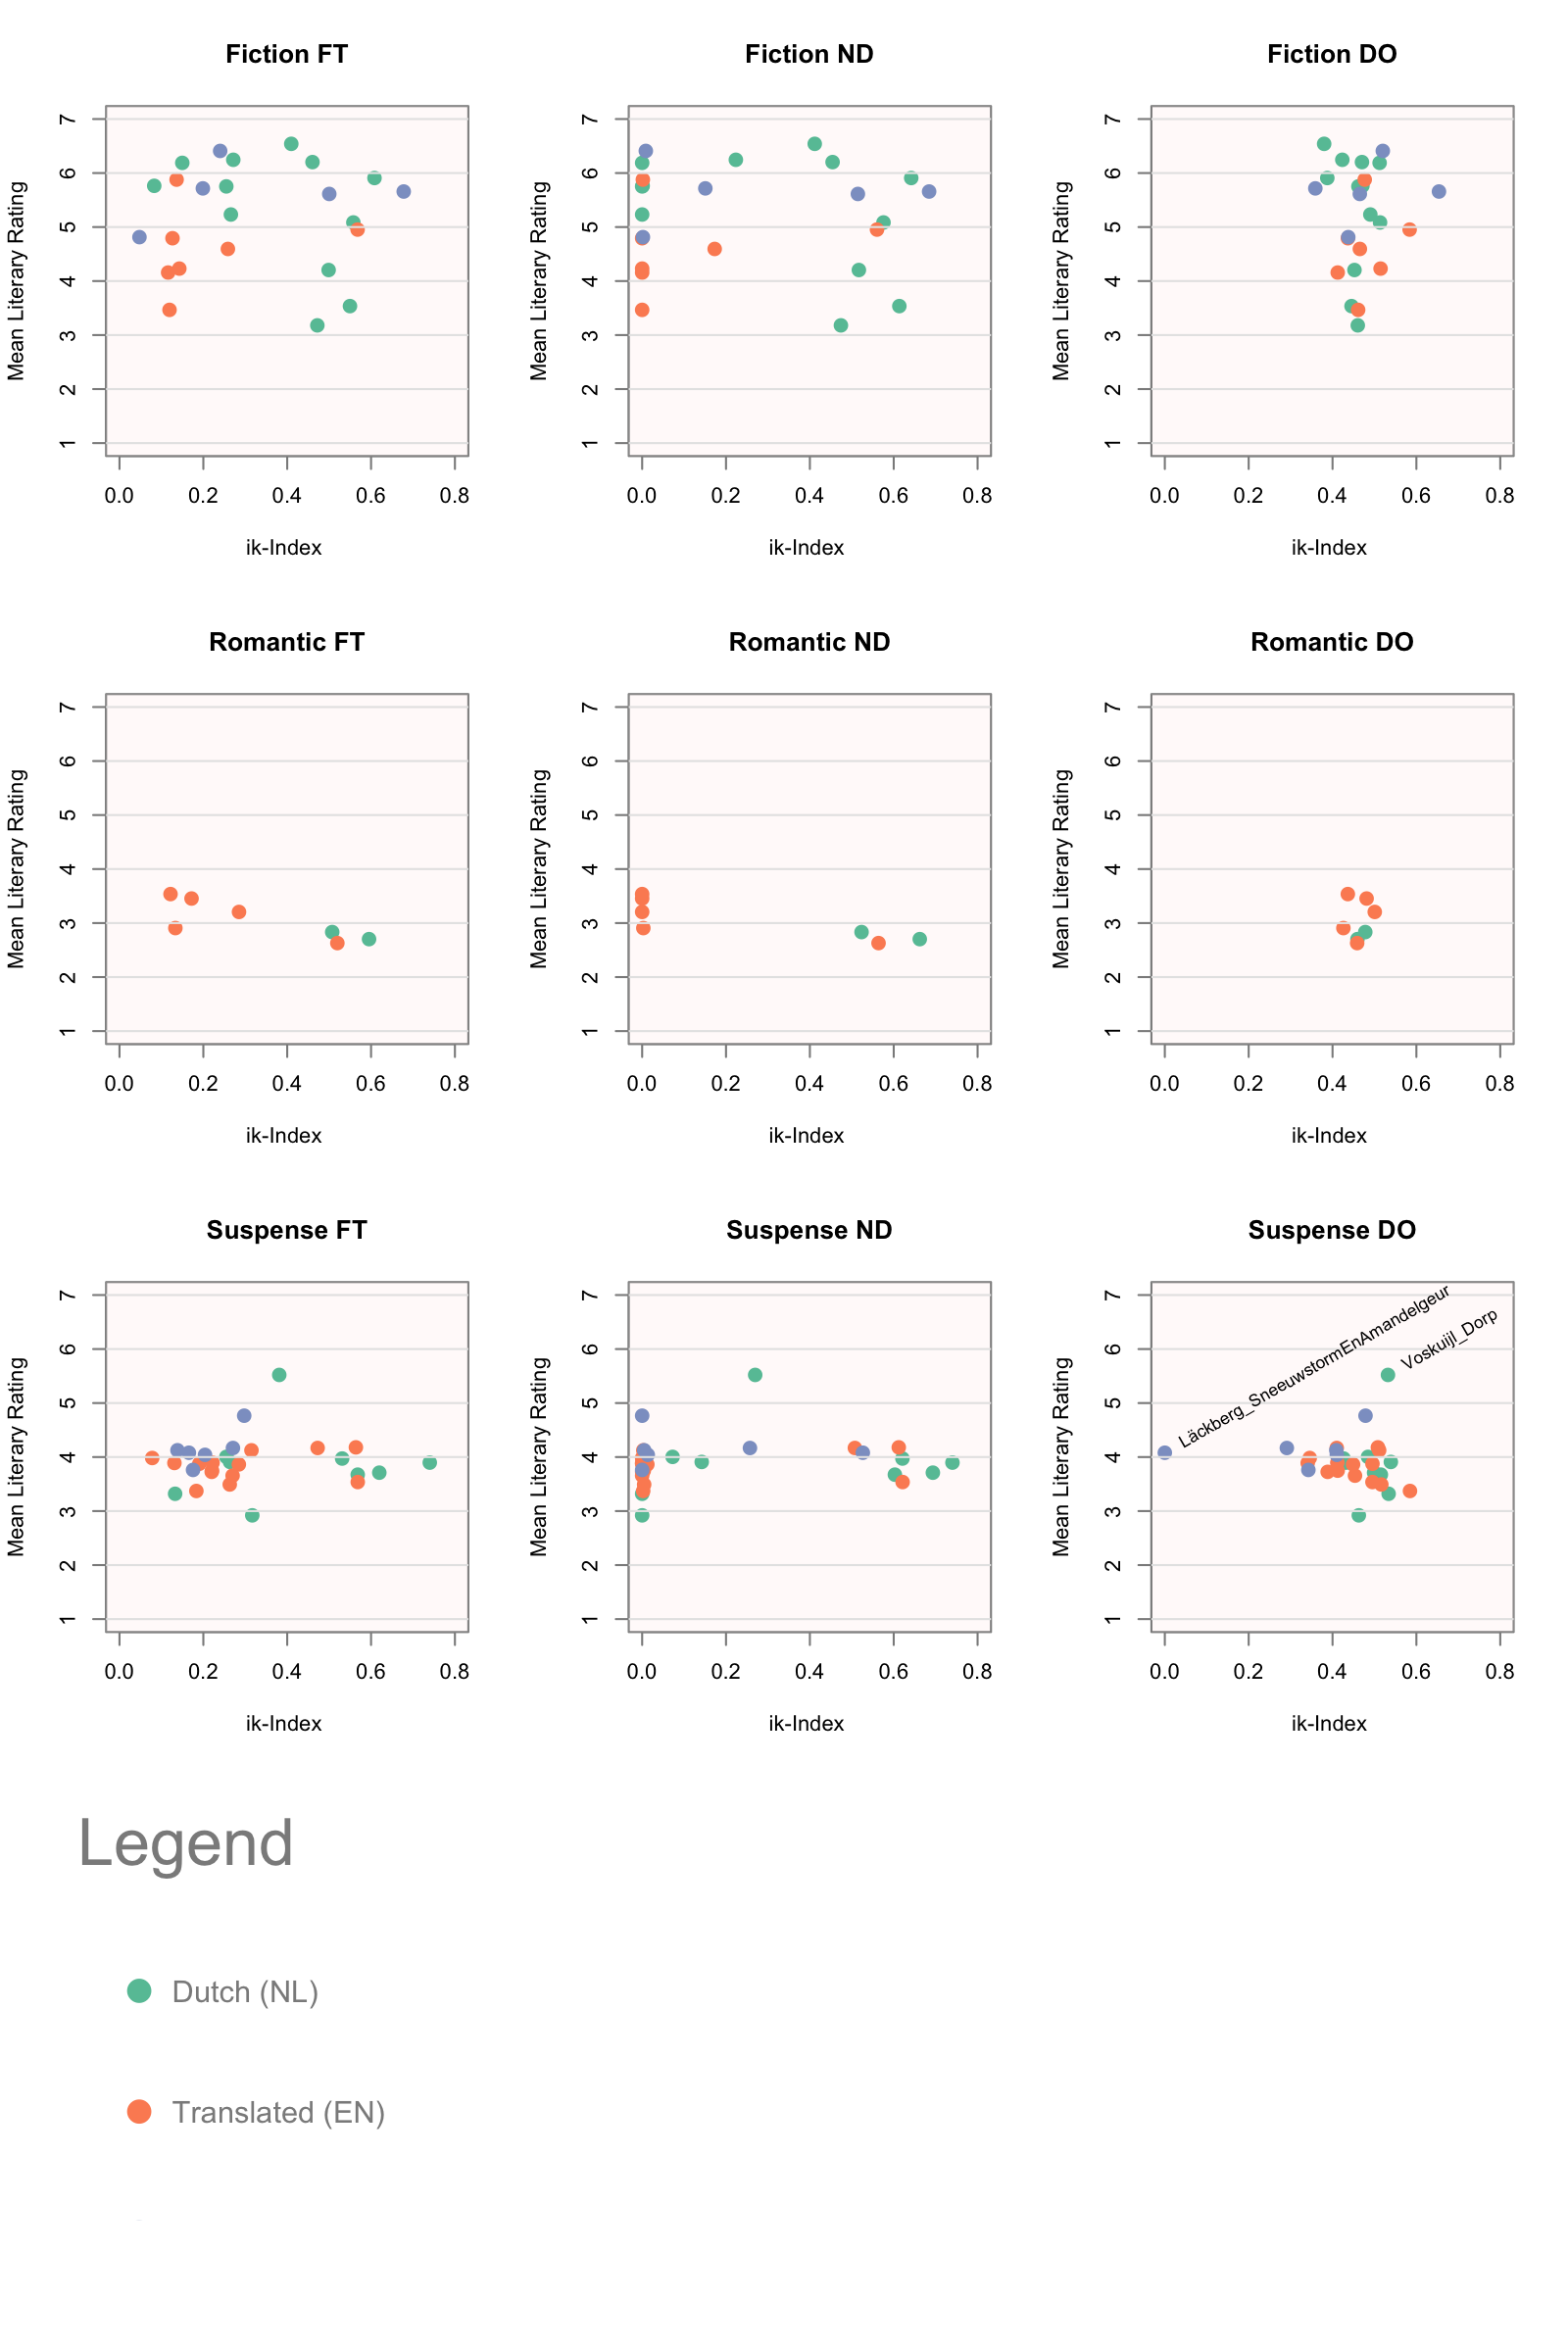

In [156]:
# Same thing really, but now we want the colors to represent the language grouping and we 
# want the different graphs to represent the different narrative parts.

save_fig=FALSE
if( save_fig ){
    png( 'images/20200708_1924/mlr_vs_iidx_by_narrative_part_language_color_coded.png', width=2200, height=2800, pointsize=32 )
}
par( fg='grey55', mfrow=c( 4, 3 ) )

other_languages <- levels( factor( iidx$org_lang, exclude=c( 'en', 'nl' ) ) )
languages <- list( list( 'nl' ), list( 'en' ), list( other_languages ) )
lang_category_map <- function( lang ){
    category <- 0
    if( lang=='nl' ){
        category <- 1
    }
    if( lang=='en' ){
        category <- 2
    }
    if( lang %in% other_languages ){
        category <- 3
    }
    return( category )
}
iidx$lang_category = sapply( iidx$org_lang, lang_category_map )

for( genre in levels( genre_id ) ) {
    rows <- iidx[ iidx$genre_riddle == genre, ]
    rows <- rows[ order( rows$lang_category ), ]
    lang_color <- sapply( rows$lang_category, function(x) cols[x] )
    narr_parts <- c( 'ft', 'nd', 'do' )
    for( narr_part in narr_parts ) {
        idx <- paste( 'ik.index_', narr_part, sep='' )
        xlabel <- paste( 'ik-Index ' )
        ylabel <- 'Mean Literary Rating'
        plot( NULL, NULL, xlim=c( 0.0, 0.8 ), ylim=c( 1.0, 7.0 ), xlab=xlabel, ylab=ylabel, main=paste( genre, toupper( narr_part ), collapse=' ' ) )
        rect( par( 'usr' )[1],par( 'usr' )[3],par( 'usr' )[2],par( 'usr' )[4],col = 'snow' )
        points( rows[[idx]], rows$mean_literary_rating, col=lang_color, pch=16, cex=1.5 )
        grid( nx=NA, ny=NULL, lty='solid', col='grey90' )
        
        # Specifically requested labeling of some points…
        if( narr_part == 'do' & genre == 'Suspense' ) {
            text( x=rows[[idx]][c(9,25)] + 0.009, y=rows$mean_literary_rating[c(9,25)] + 0.15, labels=c( 'Voskuijl_Dorp', 'Läckberg_SneeuwstormEnAmandelgeur' ), srt=30, pos=4, cex=0.8, col='black' )
        }
        
    }
}

# IMPORTANT: Note manual handling of colors and legend! Be careful when changing series order.
plot( NULL, xaxt='n', yaxt='n', bty='n', ylab='', xlab='', xlim=0:1, ylim=0:1 )
other_label <- toupper( paste( other_languages, collapse=' ' ) )
other_label <- paste( 'Translated (', other_label, ')', collapse='', sep='' )
legend( 'topleft', legend=c( 'Dutch (NL)', 'Translated (EN)', other_label ), pch=16, pt.cex=2.5, cex=1.4, bty='n', col=cols )
mtext( 'Legend', at=0.2, cex=2 )

if( save_fig ){
    dev.off()
}

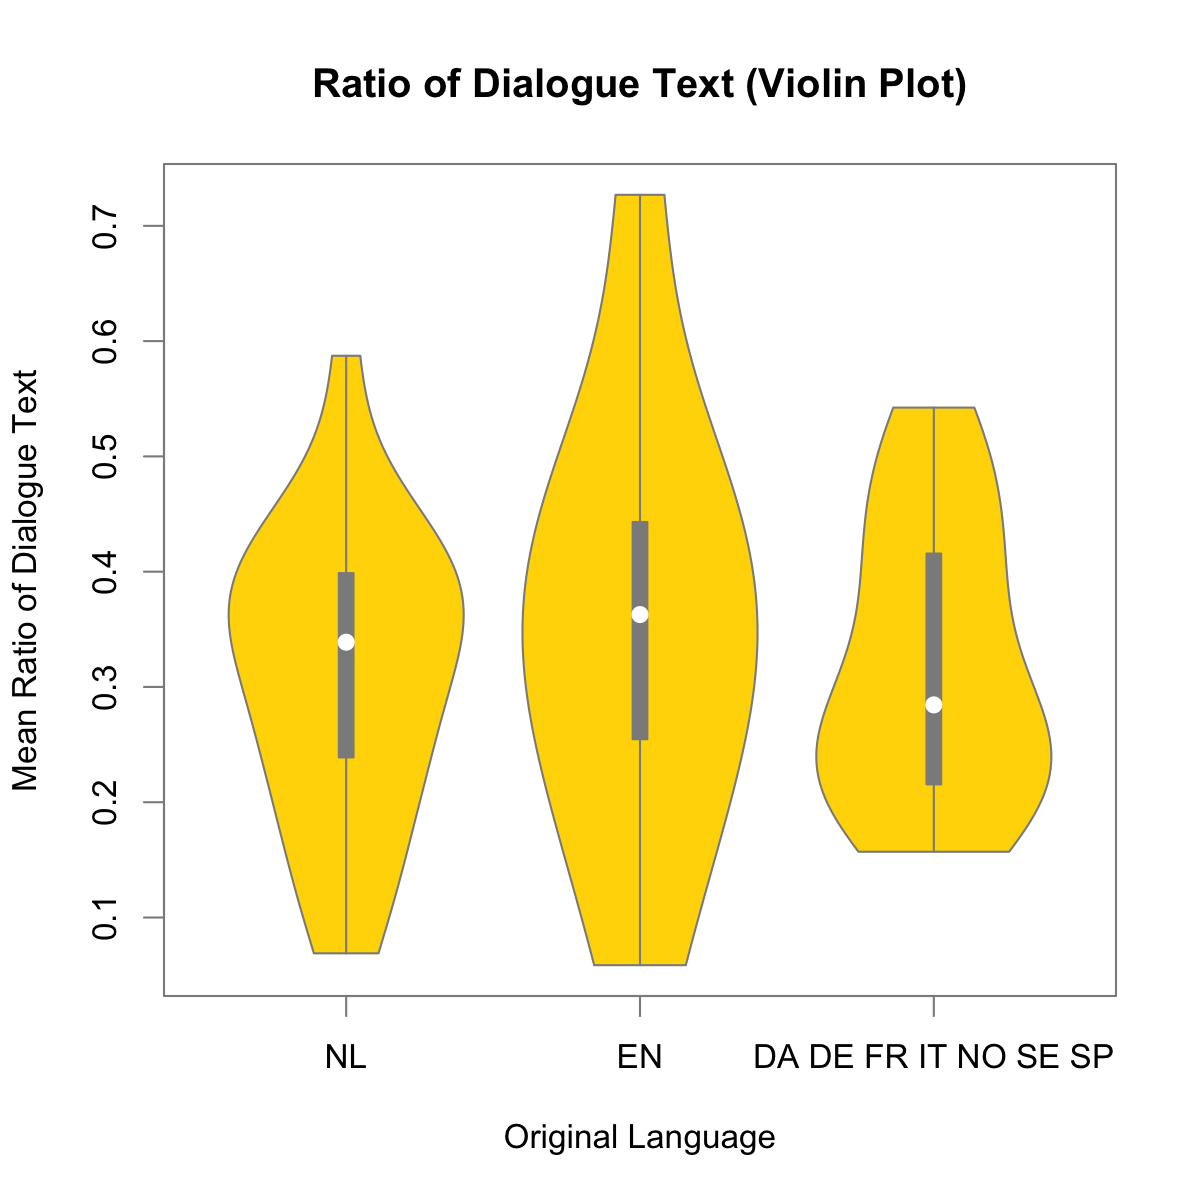

In [53]:
# The last of the visualization is a violin plot of the ratio dialogue/non dialogue text within 
# the different origin language groupings.

library( vioplot )

options( repr.plot.width=6, repr.plot.height=6, repr.plot.res=200 )
save_fig=FALSE
if( save_fig ){
    png( 'images/20200708_1924/ratio_dialogue_vs_language.png', width=700, height=800, pointsize=20 )
}
par( fg='grey55', mfrow=c( 1, 1 ) )


for( lang_cat in (1:3) ){
    mean( iidx[ iidx$lang_category==lang_cat, 'ratio_dialogue_text' ] )
    sd( iidx[ iidx$lang_category==lang_cat, 'ratio_dialogue_text' ] )
    levels( as.factor( iidx[ iidx$lang_category==lang_cat, 'org_lang' ] ) )
}

x1 <- iidx[ iidx$lang_category==1, 'ratio_dialogue_text' ]
x1_name <- toupper( levels( as.factor( iidx[ iidx$lang_category==1, 'org_lang' ] ) ) )
x2 <- iidx[ iidx$lang_category==3, 'ratio_dialogue_text' ]
x2_name <- toupper( levels( as.factor( iidx[ iidx$lang_category==2, 'org_lang' ] ) ) )
x3 <- iidx[ iidx$lang_category==2, 'ratio_dialogue_text' ]
x3_name <- toupper( paste( levels( as.factor( iidx[ iidx$lang_category==3, 'org_lang' ] ) ), collapse=' ', sep=' ' ) )
vioplot( x1, x2, x3, names=c( x1_name, x2_name, x3_name ), col='gold', main='Ratio of Dialogue Text (Violin Plot)', xlab='Original Language', ylab='Mean Ratio of Dialogue Text' )


if( save_fig ){
    dev.off()
}

In [54]:
# Lastly we produce a more neatly formatted series of tables to represent the data.
head( iidx )

,X,index_ft,ik.index_ft,token_count_ft,index_nd,ik.index_nd,token_count_nd,index_do,ik.index_do,token_count_do,ratio_dialogue_text,genre_riddle,mean_literary_rating,org_lang,lang_category
,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,0,Abdolah_Koning 2,0.2656876,9753,Abdolah_Koning 2 ZD,0.0000000,5730,Abdolah_Koning 2 AD,0.4901478,4018,0.4119758,Fiction,5.232143,nl,1
2,1,Abdolah_Kraai 17,0.6081772,9636,Abdolah_Kraai 17 ZD,0.6417323,8344,Abdolah_Kraai 17 AD,0.3875000,1290,0.1338730,Fiction,5.907960,nl,1
3,2,Adler-Olsen_VrouwInKooi 33,0.1754212,9627,Adler-Olsen_VrouwInKooi 33 ZD,0.0000000,5310,Adler-Olsen_VrouwInKooi 33 AD,0.3423598,4307,0.4473876,Suspense,3.761905,da,3
4,3,Ammaniti_JijEnIk 16,0.5003279,9587,Ammaniti_JijEnIk 16 ZD,0.5144995,6885,Ammaniti_JijEnIk 16 AD,0.4650655,2697,0.2813185,Fiction,5.613027,it,3
5,4,Baantjer_MesInRug 23,0.3166856,9588,Baantjer_MesInRug 23 ZD,0.0000000,3941,Baantjer_MesInRug 23 AD,0.4626866,5631,0.5872966,Suspense,2.920863,nl,1
6,5,Bakker_Omweg 40,0.1497758,9724,Bakker_Omweg 40 ZD,0.0000000,7246,Bakker_Omweg 40 AD,0.5122699,2458,0.2527766,Fiction,6.188679,nl,1


In [55]:
iidx_neat <- data.frame( 'txt_name' = iidx$index_ft )
iidx_neat$token_count_full_text = iidx$token_count_ft
iidx_neat$ik_index_full_text = sapply( iidx$ik.index_ft, round, 2 )
iidx_neat$token_count_dialogue = iidx$token_count_do
iidx_neat$ik_index_dialogue = sapply( iidx$ik.index_do, round, 2 )
iidx_neat$token_count_nondialogue = iidx$token_count_nd
iidx_neat$ik_index_nondialogue = sapply( iidx$ik.index_nd, round, 2 )
iidx_neat$ratio_dialogue = sapply( iidx$ratio_dialogue_text, round, 2 )
iidx_neat$genre = iidx$genre_riddle
iidx_neat$mean_literary_rating = sapply( iidx$mean_literary_rating, round, 2 )
iidx_neat$original_language = iidx$org_lanf
iidx_neat$language_category = iidx$lang_category

In [56]:
library(IRdisplay)

In [57]:
save_csv=FALSE

for( genre in levels( as.factor( iidx_neat$genre ) ) ){
    iidx_genre_subset <- iidx_neat[ iidx_neat$genre==genre, ]
    iidx_genre_subset <- iidx_genre_subset[ order( iidx_genre_subset$language_category, -iidx_genre_subset$mean_literary_rating ), ]
    display( iidx_genre_subset )
    if( save_csv ){
        file_name <- paste( 'images/20200708_1924/iidx_', genre, '.csv', sep='' )
        write.csv( iidx_genre_subset, file=file_name )
    }
}

,txt_name,token_count_full_text,ik_index_full_text,token_count_dialogue,ik_index_dialogue,token_count_nondialogue,ik_index_nondialogue,ratio_dialogue,genre,mean_literary_rating,language_category
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
41,Mortier_GestameldLiedboek 5,9792,0.41,675,0.38,9112,0.41,0.07,Fiction,6.54,1
9,Bernlef_GeleendeLevens 31,9877,0.27,1608,0.42,8260,0.22,0.16,Fiction,6.25,1
59,Wieringa_Caesarion 57,9879,0.46,2440,0.47,7427,0.45,0.25,Fiction,6.20,1
6,Bakker_Omweg 40,9724,0.15,2458,0.51,7246,0.00,0.25,Fiction,6.19,1
2,Abdolah_Kraai 17,9636,0.61,1290,0.39,8344,0.64,0.13,Fiction,5.91,1
8,Beijnum_SoortFamilie 96,9904,0.08,1106,0.47,8792,0.00,0.11,Fiction,5.76,1
60,Winter_RechtOpTerugkeer 128,9740,0.25,3300,0.46,6438,0.00,0.34,Fiction,5.75,1
1,Abdolah_Koning 2,9753,0.27,4018,0.49,5730,0.00,0.41,Fiction,5.23,1
32,Koch_ZomerhuisMetZwembad 56,9838,0.56,3169,0.51,6663,0.58,0.32,Fiction,5.09,1


,txt_name,token_count_full_text,ik_index_full_text,token_count_dialogue,ik_index_dialogue,token_count_nondialogue,ik_index_nondialogue,ratio_dialogue,genre,mean_literary_rating,language_category
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
39,Middelbeek_Turbulentie,9692,0.51,3542,0.48,6107,0.52,0.37,Romantic,2.83,1
18,Gastel_ZwaarVerliefd! 43,9783,0.60,3532,0.46,6244,0.66,0.36,Romantic,2.70,1
27,James_KleineDingen 7,9828,0.12,1898,0.44,7962,0.00,0.19,Romantic,3.54,2
42,Neill_VriendschapLiefdeEn 65,9777,0.17,2524,0.48,7197,0.00,0.26,Romantic,3.45,2
40,Montefiore_Affaire 35,9644,0.29,5058,0.50,4579,0.00,0.52,Romantic,3.21,2
16,Fallon_OpManAf 29,9762,0.13,2146,0.43,7577,0.00,0.22,Romantic,2.91,2
31,Kinsella_WatSpookJij 57,9633,0.52,3611,0.46,5889,0.56,0.37,Romantic,2.63,2


,txt_name,token_count_full_text,ik_index_full_text,token_count_dialogue,ik_index_dialogue,token_count_nondialogue,ik_index_nondialogue,ratio_dialogue,genre,mean_literary_rating,language_category
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
58,Voskuijl_Dorp 41,9698,0.38,3848,0.53,6089,0.27,0.40,Suspense,5.52,1
57,Vlugt_Herfstlied 19,9723,0.25,3767,0.48,5951,0.07,0.39,Suspense,4.00,1
45,Pauw_Daglicht 37,9667,0.53,4504,0.43,5156,0.62,0.47,Suspense,3.97,1
24,Hollander_Zielsverwanten 54,9684,0.26,2639,0.54,7039,0.14,0.27,Suspense,3.91,1
23,Hollander_Vluchtgedrag 79,6975,0.74,2825,0.43,6975,0.74,0.41,Suspense,3.90,1
22,Hollander_Naaktportret 76,9776,0.62,3950,0.50,5815,0.69,0.40,Suspense,3.71,1
55,Verhoef_Close-up 84,9670,0.57,3875,0.52,5790,0.60,0.40,Suspense,3.67,1
46,Rijn_LastMinute 21,9760,0.13,1888,0.53,7865,0.00,0.19,Suspense,3.32,1
5,Baantjer_MesInRug 23,9588,0.32,5631,0.46,3941,0.00,0.59,Suspense,2.92,1
